This report reviews the work of :Chawan, P., & Chaudhari, S. (2018). Logistic regression diabetes prediction system. ResearchGate. https://www.researchgate.net/profile/Pramila-Chawan/publication/326416823_LOGISTIC_REGRESSION_AND_SVM_BASED_DIABETES_PREDICTION_SYSTEM/links/5b4c80ddaca272c60947858a/LOGISTIC-REGRESSION-AND-SVM-BASED-DIABETES-PREDICTION-SYSTEM.pdf


# **1-Preprocessing**

In [1]:
!pip install xgboost
!pip install lime
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=277c55f0cf23fa309d5531f76ec4497f8f932e7d0333df7545741971d5cc28fc
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, f1_score, roc_auc_score
from imblearn.over_sampling import ADASYN
import xgboost as xgb
import lime
import lime.lime_tabular
import shap
from sklearn.impute import SimpleImputer
import statsmodels.api as sm
from sklearn.inspection import PartialDependenceDisplay

In [8]:
df=pd.read_csv('diabetes_prediction_dataset.csv')
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['smoking_history'] = le.fit_transform(df['smoking_history'])
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,0,27.32,6.2,90,0
99996,0,2.0,0,0,0,17.37,6.5,100,0
99997,1,66.0,0,0,3,27.83,5.7,155,0
99998,0,24.0,0,0,4,35.42,4.0,100,0


# **2**-**feature selection**

In [10]:
x = df.drop('diabetes', axis=1)
y = df['diabetes']

# **3**- **machine learning models building**

**
Abdelrahman Khaled
in the paper that i work on , they have used two models : Logistic regression and SVM ,so i will test their claim**

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [12]:
sc = StandardScaler()
X_trsc = sc.fit_transform(X_train)
X_tstsc = sc.transform(X_test)

In [13]:
model1 = LogisticRegression(random_state=42, max_iter=1000)
model1.fit(X_trsc, y_train)
model1pred = model1.predict(X_tstsc)

In [14]:
from sklearn.metrics import accuracy_score, classification_report
print("\nLogistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, model1pred))
print(classification_report(y_test, model1pred))


Logistic Regression Results:
Accuracy: 0.95865
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     18292
           1       0.86      0.61      0.72      1708

    accuracy                           0.96     20000
   macro avg       0.91      0.80      0.85     20000
weighted avg       0.96      0.96      0.96     20000



In [15]:
import statsmodels.api as sm
X_trsc = sm.add_constant(X_trsc)
logit_model = sm.Logit(y_train, X_trsc)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.113297
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:               diabetes   No. Observations:                80000
Model:                          Logit   Df Residuals:                    79991
Method:                           MLE   Df Model:                            8
Date:                Thu, 01 May 2025   Pseudo R-squ.:                  0.6101
Time:                        04:58:27   Log-Likelihood:                -9063.8
converged:                       True   LL-Null:                       -23246.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.2885      0.050   -105.674      0.000      -5.387      -5.190
x1             0.1371      0

High absolute z-score=89.301 → Strong predictor.
p-value < 0.05=0 → Statistically significant feature.

  0%|          | 0/100 [00:00<?, ?it/s]


SHAP for Logistic Regression:


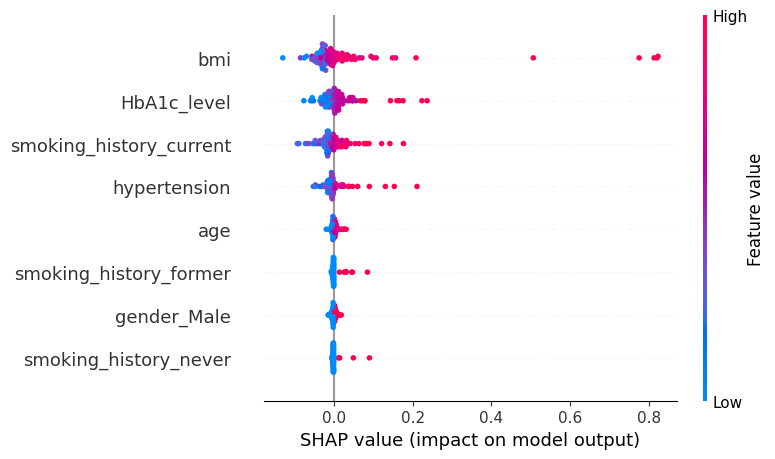

In [16]:
X_train_np = X_trsc[:, 1:]
X_test_np = X_tstsc
feature_names = ['gender_Male', 'smoking_history_current', 'smoking_history_former', 'smoking_history_never',
                 'age', 'hypertension', 'bmi', 'HbA1c_level', 'blood_glucose_level'][:8]

explainer_lr_shap = shap.KernelExplainer(model1.predict_proba, X_train_np[:100])
shap_values_lr = explainer_lr_shap.shap_values(X_test_np[:100])
print("\nSHAP for Logistic Regression:")
shap.summary_plot(shap_values_lr[:, :, 1], X_test_np[:100], feature_names=feature_names)


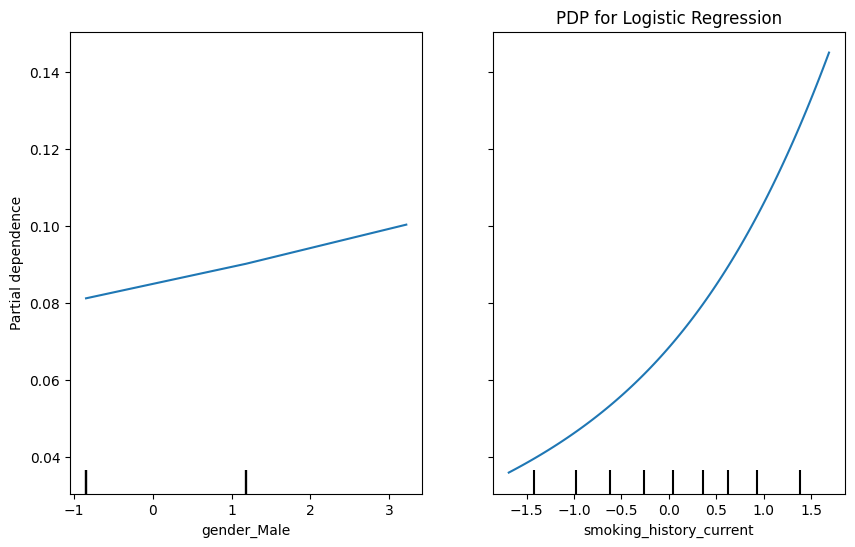

In [26]:
fig, ax = plt.subplots(figsize=(10, 6))
PartialDependenceDisplay.from_estimator(model1, X_train_np, features=[0, 1], feature_names=feature_names[:2], ax=ax)
plt.title("PDP for Logistic Regression")
plt.show()

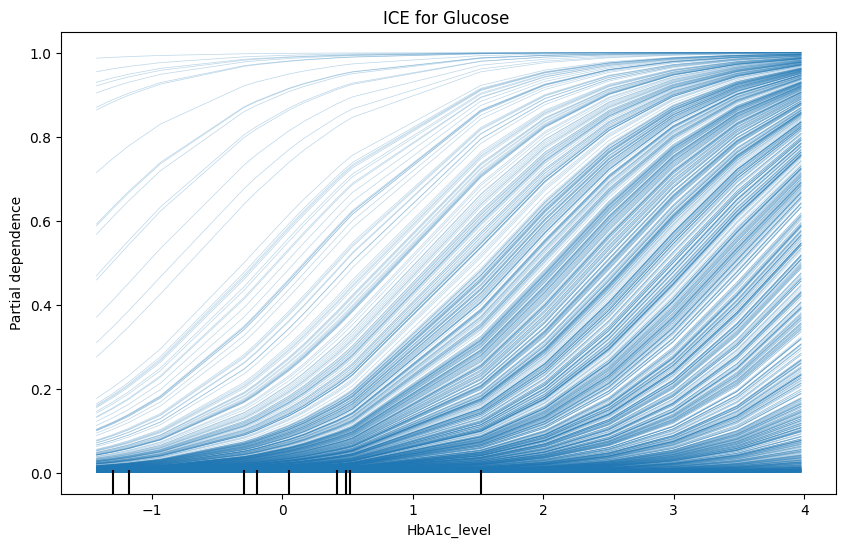

In [49]:
fig, ax = plt.subplots(figsize=(10, 6))
PartialDependenceDisplay.from_estimator(
    model1,
    X_train_np,
    features=[7],
    feature_names=feature_names,
    kind='individual',
    ax=ax,
)
plt.title("ICE for Glucose ")
plt.show()

In [47]:
z_scores = result.params / result.bse
z_score_df = pd.DataFrame({'Feature': x.columns, 'Z-score': z_scores.values[1:]})
z_score_df['Abs_Z-score'] = np.abs(z_score_df['Z-score'])
z_score_df = z_score_df.sort_values('Abs_Z-score', ascending=False)
n = 5
print(z_score_df.head(n))

               Feature    Z-score  Abs_Z-score
7  blood_glucose_level  62.186703    62.186703
6          HbA1c_level  58.864019    58.864019
1                  age  37.463675    37.463675
5                  bmi  31.174012    31.174012
2         hypertension  14.190661    14.190661
